In [1]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
from __future__ import print_function
import os
import time
import json
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy import stats
from pylab import rcParams
from sklearn.utils import check_random_state
from sklearn.datasets import load_digits
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, \
    GradientBoostingClassifier
from keras import backend as K
from keras.applications.vgg16 import VGG16
from sklearn.datasets import fetch_mldata
from sklearn import tree
from sklearn import metrics
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.models import Model
from keras.utils.vis_utils import plot_model
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from sklearn import svm
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications
import glob
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import glob
import platform
import time
from PIL import Image
from skimage.feature import hog
import numpy as np
import os
import joblib
from sklearn.svm import LinearSVC
import shutil
import sys

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import cv2



Using TensorFlow backend.


In [2]:
def getdataset(choice):
    print("Geting data now")
    classifications=['airplane','car']
    train_data_dir = 'rawdata/train/'
    validation_data_dir = 'rawdata/test/'
    
    nb_train_samples = trainset_size
    nb_validation_samples = testset_size

    
    df_train = []
    y_train_full=[]
    images = os.listdir(train_data_dir)
    i=0
    for classification in classifications:
        i=0
        imagePaths = [f for f in glob.glob(train_data_dir+classification+'/'+'*.jpg')]
        #here will take one min
        for img in imagePaths:
            if i < 20:
                img_data = load_img(img ,target_size=(150, 150))
                img_data_array = img_to_array(img_data)
                #print(img_data_array.shape)#img_data_array is (150,150,3)
                if choice == 'Raw':
                    #will get (150*150*3)
                    img_data_flat = img_data_array.reshape(img_data_array.shape[0]*img_data_array.shape[1]*img_data_array.shape[2])
                    #print(img_data_flat.shape)
                if choice == 'HOG' :
                    #will get (150,150)
                    img_data_flat=(img_data_array[:, :, 0] * 0.2989 + img_data_array[:, :, 1] * 0.5870 + img_data_array[:, :, 2] * 0.1140)/255.0
                    #print(img_data_flat.shape)
                if choice == 'Pretrained' or choice == 'Pretrained_repeat':
                    #will get is (150,150,3)
                    img_data_flat= img_data_array
                    #print(img_data_flat.shape)
                df_train.append(img_data_flat)
                #print(classification)
                if classification == "airplane":
                    y_train_full.append(0)
                if classification == "car":
                    y_train_full.append(1)
            i+=1
    #print(y_train_full)
            

    df_val = []
    y_test = []
    images = os.listdir(validation_data_dir)
    num=0
    for classification in classifications:
        imagePaths = [f for f in glob.glob(validation_data_dir+classification+'/'+'*.jpg')]
        for img in imagePaths:
            img_data = load_img(img ,target_size=(150, 150))
            img_data_array = img_to_array(img_data)
            if choice == 'Raw':
                #will get (150*150*3)
                img_data_flat = img_data_array.reshape(img_data_array.shape[0]*img_data_array.shape[1]*img_data_array.shape[2])
                #print(img_data_flat.shape)
            if choice == 'HOG' :
                #will get (150,150)
                img_data_flat=(img_data_array[:, :, 0] * 0.2989 + img_data_array[:, :, 1] * 0.5870 + img_data_array[:, :, 2] * 0.1140)/255.0
                #print(img_data_flat.shape)
            if choice == 'Pretrained' or choice == 'Pretrained_repeat':
                #will get is (150,150,3)
                img_data_flat= img_data_array
                #print(img_data_flat.shape)
            df_val.append(img_data_flat)
            if classification == "airplane":
                    #print(str(num))
                    #print(":"+img)
                    listofdata.append(img[-17:])
                    num+=1
                    y_test.append(0)
            if classification == "car":
                    #print(str(num))
                    #print(":"+img)
                    num+=1
                    listofdata.append(img[-12:])
                    y_test.append(1)
            #print(y_train_full)

    #This will run for 10second
    X_train_full = np.concatenate([arr[np.newaxis] for arr in df_train]).astype('float32')
    X_test = np.concatenate([arr[np.newaxis] for arr in df_val]).astype('float32')

    #将list 转成np，否则会有报错
    y_train_full=np.array(y_train_full)
    y_test=np.array(y_test)

    if choice =='HOG':
        X_test_new=[]
        X_train_new=[]
        for num in range(0,trainset_size):
            fd = hog(X_train_full[num], orientations=12,block_norm='L1', pixels_per_cell=[8, 8], cells_per_block=[4, 4], visualize=False,transform_sqrt=False
                    )
            X_train_new.append(fd)

        for num in range(0,testset_size):
            fd = hog(X_test[num], orientations=12,block_norm='L1', pixels_per_cell=[8, 8], cells_per_block=[4, 4], visualize=False,
                             transform_sqrt=True)
            X_test_new.append(fd)

        X_train_full=np.array(X_train_new)
        X_test=np.array(X_test_new)

    if choice == 'Pretrained':
        model = applications.VGG16(include_top=False, weights='imagenet')
        last_layer = Model(inputs=model.input, outputs=model.get_layer('block5_pool').output)

        start = time.clock()
        print("Process data though the pretrained mdoel(train set), it will last for about 8 mins")
        features = last_layer.predict(X_train_full)
        elapsed = (time.clock() - start)
        print("(should about 8 mins)Time used:",elapsed)

        start = time.clock()
        print("Process data though the pretrained mdoel(test set), it will last for about 2 mins")
        features_test = last_layer.predict(X_test)
        elapsed = (time.clock() - start)
        print("(should about 100second)Time used:",elapsed)

        X_train_full = features.reshape(trainset_size,-1)
        X_test=features_test.reshape(testset_size,-1)

        np.save('bottleneck_features_train_forexperiment.npy',X_train_full)
        np.save('bottleneck_features_test_forexperiment.npy',X_test)

    if choice == 'Pretrained' or choice == 'Pretrained_repeat':
        X_train_full=np.load('bottleneck_features_train_forexperiment.npy')
        X_test=np.load('bottleneck_features_test_forexperiment.npy')
    #print(y_train_full)
        
        
    print("Got all data now, here is the shape of the data")
    print("X_train_full shape: "+str(X_train_full.shape))
    print("y_train_full shape: "+str(y_train_full.shape))
    print("X_test shape: "+str(X_test.shape))
    print("y_test shape: "+str(y_test.shape))
        
    return (X_train_full,y_train_full,X_test,y_test)



In [3]:
def getdataset_toshow(choice):
    print("Geting data now")
    classifications=['airplane','car']
    train_data_dir = 'rawdata/train/'
    validation_data_dir = 'rawdata/test/'
    
    nb_train_samples = trainset_size
    nb_validation_samples = testset_size

    df_val = []
    images = os.listdir(validation_data_dir)
    num=0
    for classification in classifications:
        imagePaths = [f for f in glob.glob(validation_data_dir+classification+'/'+'*.jpg')]
        for img in imagePaths:
            img_data = load_img(img ,target_size=(150, 150))
            img_data=np.array(img_data)
            df_val.append(img_data)
            
    df_val=np.array(df_val)
 
    return (df_val)



In [4]:
listofdata=[]
trainset_size=40
testset_size=400
(X_train_full,y_train_full,X_test,y_test)=getdataset('Pretrained_repeat')
X_test_toshow=getdataset_toshow('Raw')


Geting data now
Got all data now, here is the shape of the data
X_train_full shape: (40, 8192)
y_train_full shape: (40,)
X_test shape: (400, 8192)
y_test shape: (400,)
Geting data now


In [5]:
classifier = RandomForestClassifier(n_estimators=500, class_weight='balanced')

In [6]:
classifier.fit(X_train_full, y_train_full)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [7]:
test_y_predicted = classifier.predict(X_test)

These are names and pictures of wrong predicts in testset
airplane_0179.jpg


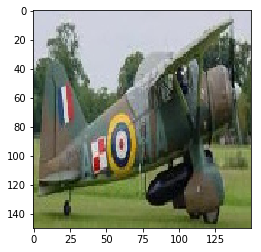

airplane_0191.jpg


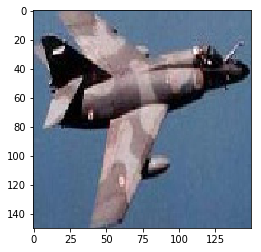

In [8]:
j=0
print("These are names and pictures of wrong predicts in testset")
for j in range(0,400):
    if test_y_predicted[j]!=y_test[j]:
        #print(str(j))
        print(listofdata[j])
        X_test_toshow[j]
        plt.imshow(X_test_toshow[j])
        plt.show()